# Explore here

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Get New York Airbnb data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

# Print the first rows of the dataframe for visualization
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [154]:
df.shape

(48895, 16)

In [155]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [157]:
# Start Exploratory data analysis (EDA)

# Count the number of unique values in total_df Dataframe
df.nunique()

# Eliminate irrelevant data
df.drop(['id','name','host_name','last_review'],axis=1, inplace=True)
df.shape

(48895, 12)

In [158]:
# Check if duplicates
print(f"Duplicate values: {df.duplicated().sum():.2f}")

Duplicate values: 0.00


In [159]:
# Description of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


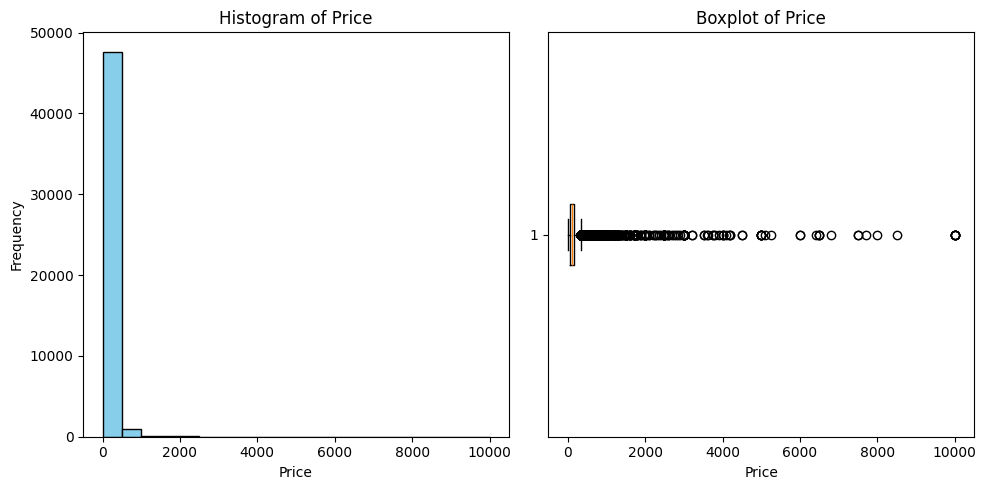

In [160]:
# Histogram and boxplot of the price variable
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Histogram in the first subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Price')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

# Boxplot in the second subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot of Price')
ax[1].set_xlabel('Price')

# Show the graph
plt.tight_layout()
plt.show()

int64
Number of zero values of 'price' column is: 11
Updated number of zero values of 'price' column is: 0


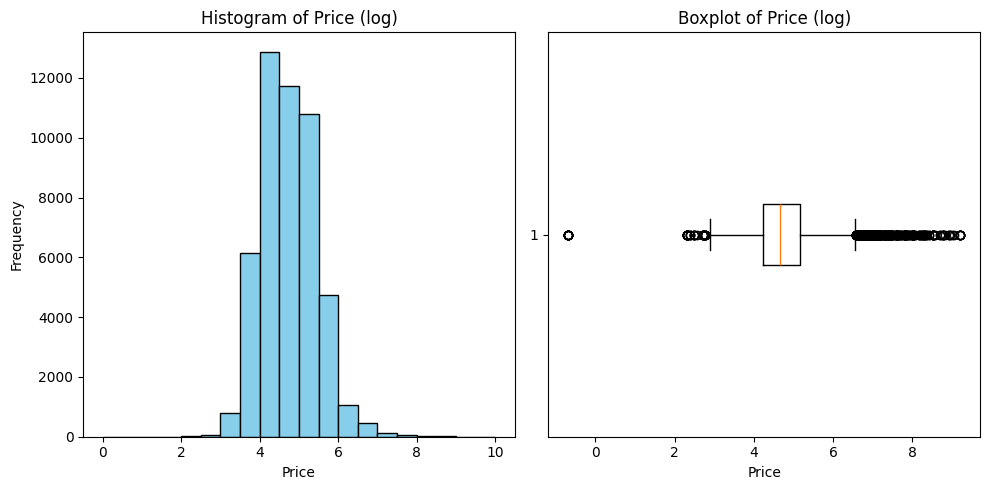

In [161]:
# Add a column to df with the log price
print(df['price'].dtypes)
zero_values = (df['price'] == 0).sum()
print(f"Number of zero values of 'price' column is: {zero_values}")

# Firstly, add 0.5 to zero values price
df['price'] = df['price'].map(lambda x: x + 0.5 if x == 0 else x)
zero_values = (df['price'] == 0).sum()
print(f"Updated number of zero values of 'price' column is: {zero_values}")

df['log_price'] = np.log(df['price'])
# Histogram and boxplot of the log price
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Histogram in the first subplot
ax[0].hist(df['log_price'], bins=20, range=[0, 10], color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Price (log)')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

# Boxplot in the second subplot
ax[1].boxplot(df['log_price'], vert=False)
ax[1].set_title('Boxplot of Price (log)')
ax[1].set_xlabel('Price')

# Show the graph
plt.tight_layout()
plt.show()



In [162]:
# Check the lines with at least one isnull value (%)
print(f"Lines with at least one isnull value in df: {df.isnull().any(axis=1).mean()*100:.2f} %")


Lines with at least one isnull value in df: 20.56 %


<Axes: >

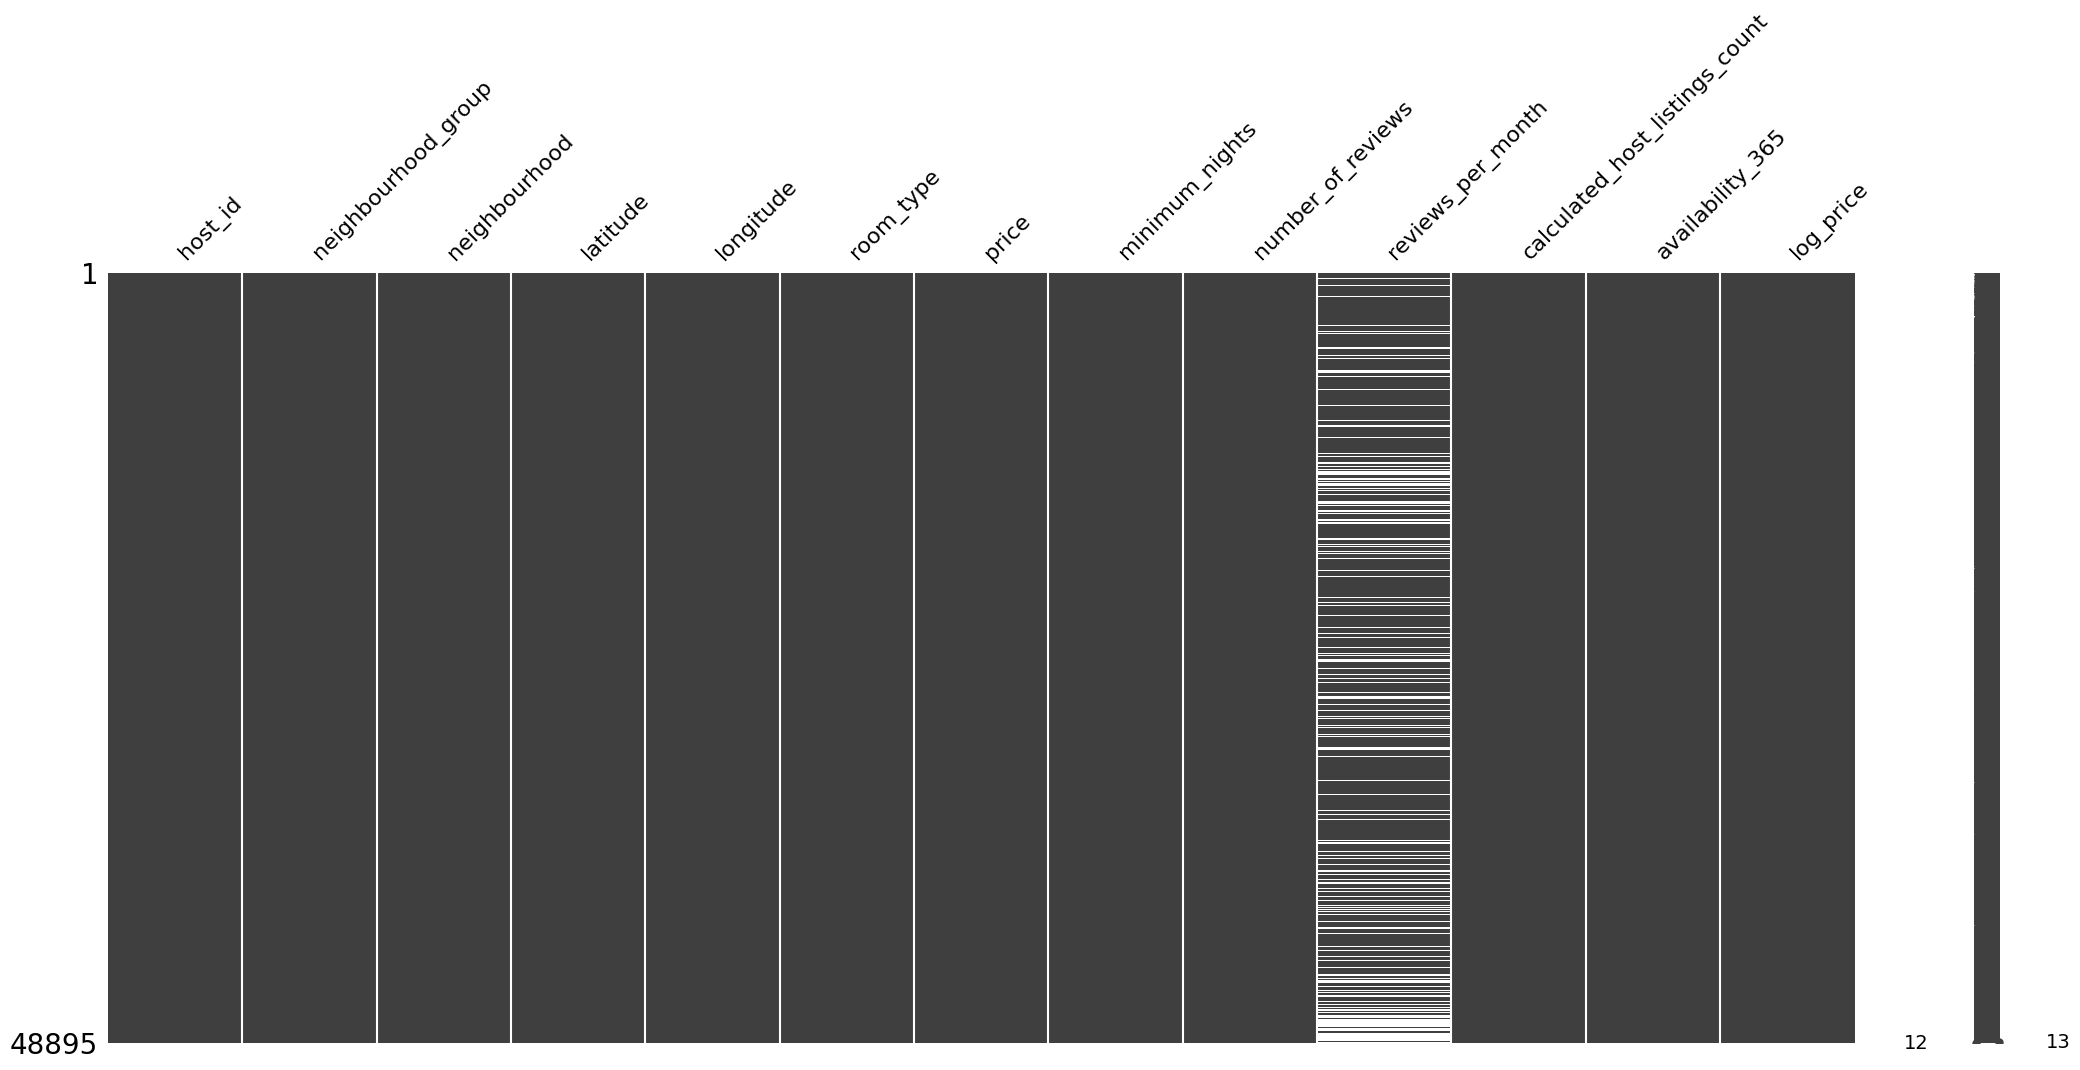

In [163]:
# Visualize missing values in dataframe 
msno.matrix(df)

<Axes: >

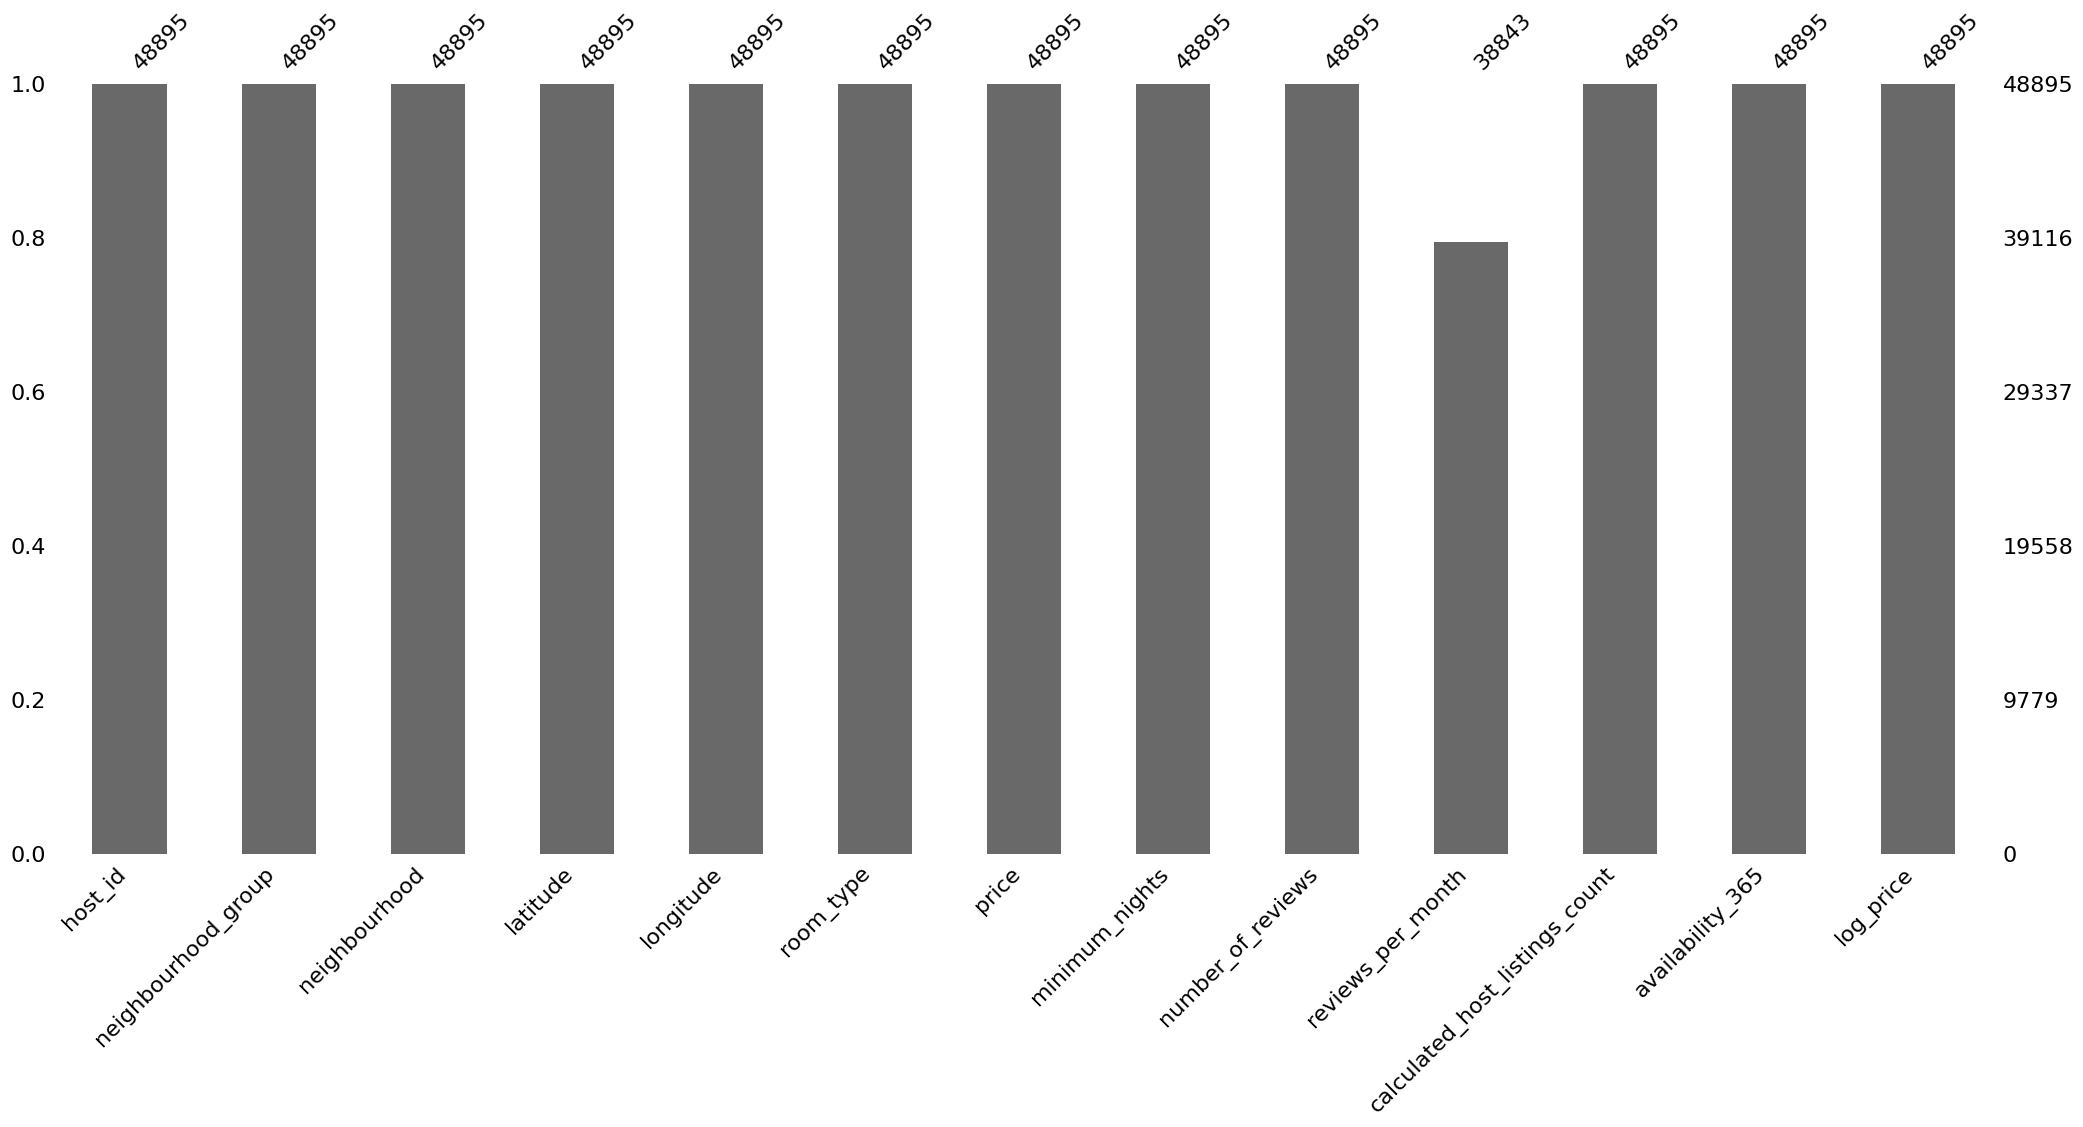

In [164]:
msno.bar(df) 

In [165]:
# Create a new dataframe replacing NaN to zero in 'reviews_per_month' column
df2=df.copy()
df2['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipykernel_497/3367659281.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['reviews_per_month'].fillna(0, inplace=True)


In [166]:
# Check the lines with at least one isnull value (%)
print(f"Lines with at least one isnull value in df2: {df2.isnull().any(axis=1).mean()*100:.2f} %")

Lines with at least one isnull value in df2: 0.00 %


In [167]:
# Change categories columns to numeric

print(df2['neighbourhood_group'].unique())
# 5 values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

# Change 'neighbourhood_group' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df2['neighbourhood_group'] = label_encoder.fit_transform(df2['neighbourhood_group'])


['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [168]:
print(df2['neighbourhood'].unique())
# 221 values: ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem' ... 'Willowbrook']
# Change 'neighbourhood' column to numeric
# Calculate the frequency of each category
frequency_encoding = df2['neighbourhood'].value_counts().to_dict()
# Map the frequencies to the original DataFrame
df2['neighbourhood'] = df2['neighbourhood'].map(frequency_encoding)

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [169]:
print(df2['room_type'].unique())
# 3 values: ['Private room' 'Entire home/apt' 'Shared room']
# Change 'room_type' column to numeric
df2["room_type"] = df2["room_type"].replace(
       { "Private room": 1, "Entire home/apt": 2, "Shared room": 3 })

df2.info()

df2.shape


['Private room' 'Entire home/apt' 'Shared room']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  int64  
 2   neighbourhood                   48895 non-null  int64  
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  int64  
 6   price                           48895 non-null  float64
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-nu

/tmp/ipykernel_497/1067693333.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["room_type"] = df2["room_type"].replace(


(48895, 13)

In [170]:
# Calculate influence
# Split x and y variables
X = df2.drop(['price','log_price'], axis=1)
y = df2['log_price']

# OLS regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(f"Columns names X: {X.columns.values}")

Columns names X: ['const' 'host_id' 'neighbourhood_group' 'neighbourhood' 'latitude'
 'longitude' 'room_type' 'minimum_nights' 'number_of_reviews'
 'reviews_per_month' 'calculated_host_listings_count' 'availability_365']


In [171]:
# Eliminate "const" column in the dataframe X
X = X.drop(columns=['const'])               
print("X: ")
X.head()


X: 


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,175,40.64749,-73.97237,1,1,9,0.21,6,365
1,2845,2,1545,40.75362,-73.98377,2,1,45,0.38,2,355
2,4632,2,2658,40.80902,-73.94190,1,3,0,0.00,1,365
3,4869,1,572,40.68514,-73.95976,2,1,270,4.64,1,194
4,7192,2,1117,40.79851,-73.94399,2,10,9,0.10,1,0


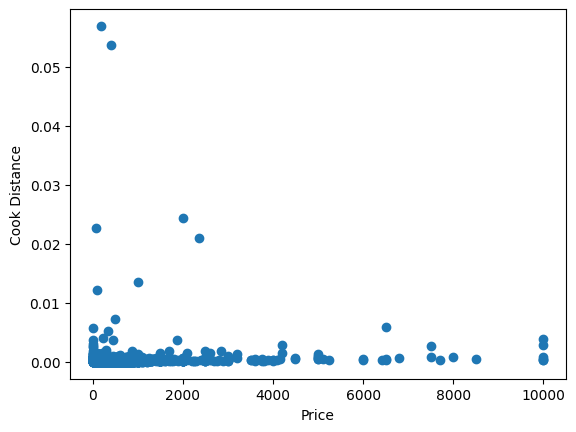

In [172]:
# Calculate the Cook distance
cooks_distance = model.get_influence().cooks_distance

# Scatter plot of the Cook distance vs price
plt.scatter(df2.price, cooks_distance[0])
plt.xlabel('Price')
plt.ylabel('Cook Distance')
plt.show()

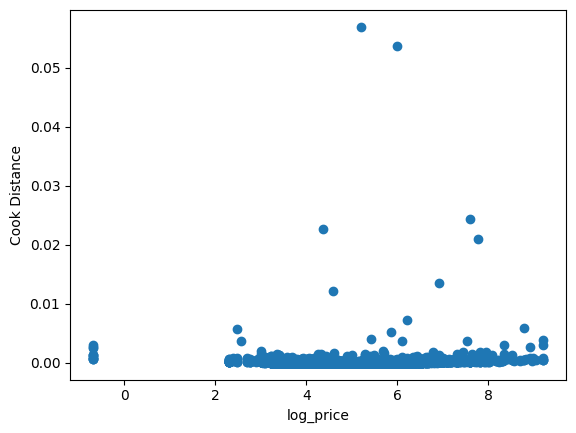

In [173]:
# Scatter plot of the Cook distance vs log_price
plt.scatter(df2.log_price, cooks_distance[0])
plt.xlabel('log_price')
plt.ylabel('Cook Distance')
plt.show()

In [174]:
# Cook distance threshold
t_point = 4/len(df2)
print(f"t_point: {t_point}")
# Calculate any houses that exceed the 4/n threshold
print(f"Houses that exceed the 4/n threshold: {len(np.where(cooks_distance[0]>t_point)[0]):.2f}")
print(np.where(cooks_distance[0]>0.005))


t_point: 8.180795582370386e-05
Houses that exceed the 4/n threshold: 2754.00
(array([ 2854,  3398,  5767, 13404, 13788, 13886, 17811, 21281, 26341,
       44429, 48043]),)


In [175]:
# House 2854
df2.iloc[2854,]

host_id                           6.676776e+06
neighbourhood_group               2.000000e+00
neighbourhood                     7.000000e+01
latitude                          4.071239e+01
longitude                        -7.401620e+01
room_type                         2.000000e+00
price                             4.000000e+02
minimum_nights                    1.000000e+03
number_of_reviews                 0.000000e+00
reviews_per_month                 0.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  3.620000e+02
log_price                         5.991465e+00
Name: 2854, dtype: float64

In [176]:
# Eliminate influences
df3=df2.drop(np.where(cooks_distance[0]>t_point)[0])

In [177]:
stats = df3.describe(include="all")
print(stats)


            host_id  neighbourhood_group  neighbourhood      latitude  \
count  4.614100e+04         46141.000000   46141.000000  46141.000000   
mean   6.489017e+07             1.654125    1544.590754     40.729798   
std    7.681253e+07             0.705437    1255.525242      0.053133   
min    2.438000e+03             0.000000       1.000000     40.508680   
25%    7.503643e+06             1.000000     426.000000     40.690660   
50%    2.911001e+07             2.000000    1117.000000     40.723450   
75%    1.020114e+08             2.000000    2465.000000     40.763210   
max    2.743213e+08             4.000000    3920.000000     40.913060   

          longitude     room_type         price  minimum_nights  \
count  46141.000000  46141.000000  46141.000000    46141.000000   
mean     -73.952303      1.535381    137.171366        6.541601   
std        0.042221      0.506599    101.713929       13.636338   
min      -74.239860      1.000000     15.000000        1.000000   
25%    

In [178]:
# Feature importance
# Train/test split
X = df3.drop(['price','log_price'], axis=1)
y = df3['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance using xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp


,Feature,Importance
5,room_type,86.449829
4,longitude,3.353241
3,latitude,2.048115
6,minimum_nights,1.478216
10,availability_365,1.287667
1,neighbourhood_group,1.187423
9,calculated_host_listings_count,1.039027
2,neighbourhood,1.038784
7,number_of_reviews,0.920878
8,reviews_per_month,0.647069


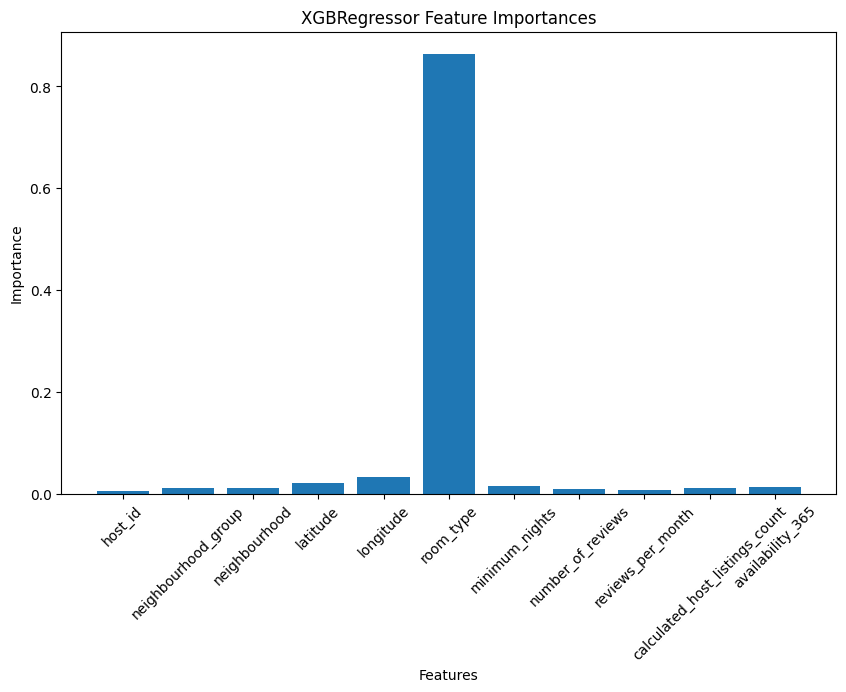

In [179]:
# Extract feature importances
importances = xgb_model.feature_importances_
feature_names=X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("XGBRegressor Feature Importances")
plt.show()

In [180]:
print(type(importances))  
print(importances)

<class 'numpy.ndarray'>
[0.00549748 0.01187423 0.01038784 0.02048115 0.03353241 0.8644983
 0.01478216 0.00920878 0.00647069 0.01039027 0.01287667]


In [181]:
df_imp[df_imp.Importance>1]['Feature'].values

array(['room_type', 'longitude', 'latitude', 'minimum_nights',
       'availability_365', 'neighbourhood_group',
       'calculated_host_listings_count', 'neighbourhood'], dtype=object)

In [182]:
# Select the features with more than 1% of importance
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]
X_train

,room_type,longitude,latitude,minimum_nights,availability_365,neighbourhood_group,calculated_host_listings_count,neighbourhood
14064,2,-73.96505,40.68370,5,0,1,1,572
38727,2,-73.99637,40.73897,30,1,2,232,1113
26113,2,-73.95041,40.77123,30,284,2,33,1798
26973,2,-74.00476,40.72706,2,6,2,1,358
35546,1,-73.93290,40.66240,1,365,1,6,500
...,...,...,...,...,...,...,...,...
11707,2,-73.96552,40.80059,1,80,2,1,1971
47349,1,-73.92554,40.69624,1,160,1,6,2465
40010,1,-73.95435,40.69162,2,0,1,2,3714
902,2,-73.98293,40.75023,10,101,2,1,1545


In [183]:
# VIF
X_train.corr()

,room_type,longitude,latitude,minimum_nights,availability_365,neighbourhood_group,calculated_host_listings_count,neighbourhood
room_type,1.000000,-0.212676,-0.002556,0.101115,-0.002609,0.030308,0.104699,-0.063028
longitude,-0.212676,1.000000,0.055031,-0.081891,0.100518,0.159284,-0.114018,-0.030987
latitude,-0.002556,0.055031,1.000000,0.032722,0.003247,0.380667,0.025085,0.006318
minimum_nights,0.101115,-0.081891,0.032722,1.000000,0.191288,0.026876,0.200071,-0.011670
availability_365,-0.002609,0.100518,0.003247,0.191288,1.000000,0.064197,0.231545,-0.079373
neighbourhood_group,0.030308,0.159284,0.380667,0.026876,0.064197,1.000000,0.080501,-0.334751
calculated_host_listings_count,0.104699,-0.114018,0.025085,0.200071,0.231545,0.080501,1.000000,-0.069571
neighbourhood,-0.063028,-0.030987,0.006318,-0.011670,-0.079373,-0.334751,-0.069571,1.000000


In [184]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

room_type                         1.287995
longitude                         1.516488
latitude                          2.000894
minimum_nights                    1.356355
availability_365                  1.491685
neighbourhood_group               3.174293
calculated_host_listings_count    1.535661
neighbourhood                     1.800848
dtype: float64

<Axes: >

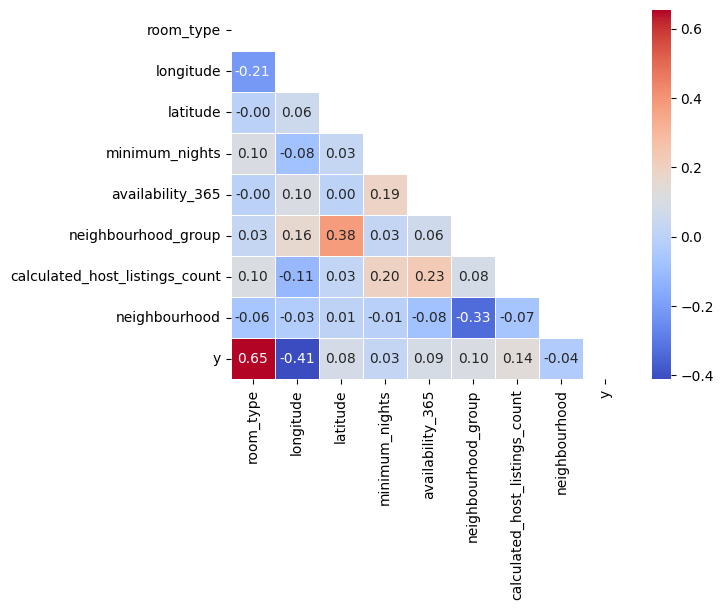

In [185]:
# Heatmap of correlation
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [186]:
# As VIF<10 and there are no two features with a high correlation, none feature is dropped.

In [187]:
# Binary variables
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [188]:
# No binary variables in X_train

In [189]:
# Features scaling
# Scaling of the train values
scaler = MinMaxScaler().fit(X_train)
# Transformation with the calculated scaler
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc


array([[0.5       , 0.52158977, 0.43281072, ..., 0.25      , 0.        ,
        0.14548239],
       [0.5       , 0.46214436, 0.56948909, ..., 0.5       , 0.70858896,
        0.28356304],
       [0.5       , 0.54937651, 0.64926554, ..., 0.5       , 0.09815951,
        0.45839714],
       ...,
       [0.        , 0.54189838, 0.45239626, ..., 0.25      , 0.00306748,
        0.94742215],
       [0.5       , 0.4876535 , 0.59733419, ..., 0.5       , 0.        ,
        0.39382338],
       [0.5       , 0.48662858, 0.39895643, ..., 0.25      , 0.        ,
        0.12863706]], shape=(36912, 8))

In [190]:
X_train_sc = pd.concat([pd.DataFrame(X_train_sc, columns = X_train.columns)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_sc, columns = X_test.columns)], axis=1)
# Final X_train
X_train_sc

,room_type,longitude,latitude,minimum_nights,availability_365,neighbourhood_group,calculated_host_listings_count,neighbourhood
0,0.5,0.521590,0.432811,0.008016,0.000000,0.25,0.000000,0.145482
1,0.5,0.462144,0.569489,0.058116,0.002740,0.50,0.708589,0.283563
2,0.5,0.549377,0.649266,0.058116,0.778082,0.50,0.098160,0.458397
3,0.5,0.446220,0.540037,0.002004,0.016438,0.50,0.000000,0.090863
4,0.0,0.582611,0.380137,0.000000,1.000000,0.25,0.015337,0.127106
...,...,...,...,...,...,...,...,...
36907,0.5,0.520698,0.721871,0.000000,0.219178,0.50,0.000000,0.502552
36908,0.0,0.596580,0.463821,0.000000,0.438356,0.25,0.015337,0.628637
36909,0.0,0.541898,0.452396,0.002004,0.000000,0.25,0.003067,0.947422
36910,0.5,0.487654,0.597334,0.018036,0.276712,0.50,0.000000,0.393823
